In [1]:
from dataclasses import dataclass, field

In [2]:
nums = [100, 500, 1000, 2000] 
files = []
for num in nums:
    files.append(f"objs/llm_train_{num}.pkl")

In [3]:
import pickle
def load_obj(name):
    """
    从文件加载对象
    :param name: 文件的名称（包括路径
    :return: 反序列化后的对象  
    """  
    with open(name, 'rb') as f:
        return pickle.load(f)

In [4]:
from dataclasses import dataclass, field

@dataclass
class EvalData:
    name : str
    in_cnt : int = 0
    not_in_cnt : int = 0
    preds : list = field(default_factory=list)
    labels : list = field(default_factory=list)
    not_in_texts : list = field(default_factory=list)
    eval : dict = field(default_factory=dict)

In [5]:
data = []
for file in files:
    eval_data = load_obj(file)
    data.append(eval_data.eval)
data

[{'accuracy': 0.4112,
  'precision': 0.5038622338406342,
  'recall': 0.3877156350222432,
  'f1': 0.3668822842241817},
 {'accuracy': 0.5996,
  'precision': 0.5788487253190571,
  'recall': 0.4837329967423252,
  'f1': 0.4964376689864948},
 {'accuracy': 0.6398,
  'precision': 0.5973046169316444,
  'recall': 0.5621333215470578,
  'f1': 0.5666366360473007},
 {'accuracy': 0.6844,
  'precision': 0.6462028550127747,
  'recall': 0.6490263193490483,
  'f1': 0.6450896364576217}]

In [6]:
import os
from evaluate.visualization import radar_plot

os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'

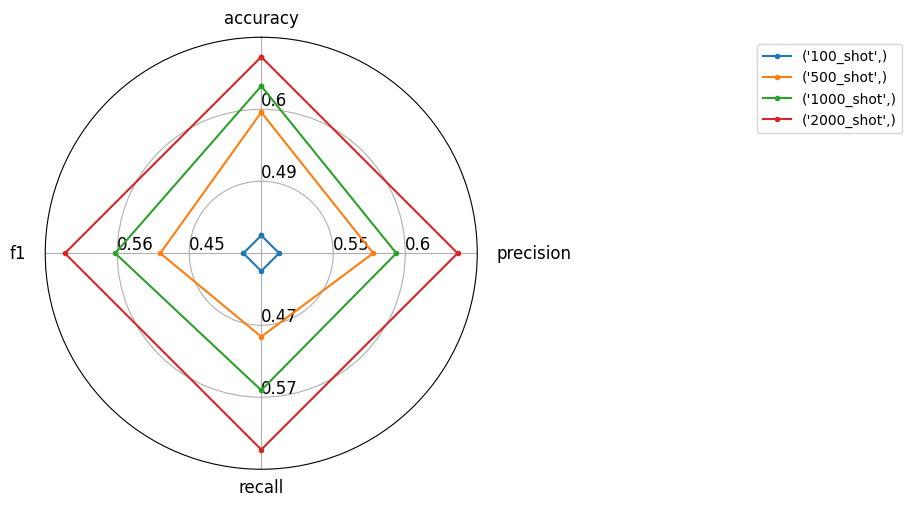

In [7]:
model_names = ["100_shot", "500_shot", "1000_shot", "2000_shot"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()